In [1]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')
zip_ref.close()

train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')


In [2]:
import tensorflow as tf

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [4]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:

train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    './validation-horse-or-human',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 100,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/100
8/8 [==============================] - 17s 2s/step - loss: 0.7037 - acc: 0.5417 - val_loss: 0.6782 - val_acc: 0.5000
Epoch 2/100
8/8 [==============================] - 18s 2s/step - loss: 0.6792 - acc: 0.5628 - val_loss: 0.7925 - val_acc: 0.5000
Epoch 3/100
8/8 [==============================] - 20s 3s/step - loss: 0.6842 - acc: 0.5928 - val_loss: 0.6246 - val_acc: 0.5938
Epoch 4/100
8/8 [==============================] - 19s 2s/step - loss: 0.6479 - acc: 0.6533 - val_loss: 0.6366 - val_acc: 0.5391
Epoch 5/100
8/8 [==============================] - 19s 2s/step - loss: 0.6141 - acc: 0.7324 - val_loss: 0.6517 - val_acc: 0.5000
Epoch 6/100
8/8 [==============================] - 17s 2s/step - loss: 0.6713 - acc: 0.6162 - val_loss: 0.5495 - val_acc: 0.6602
Epoch 7/100
8/8 [==============================] - 18s 2s/st

8/8 [==============================] - 18s 2s/step - loss: 0.2138 - acc: 0.9221 - val_loss: 0.9218 - val_acc: 0.8008
Epoch 61/100
8/8 [==============================] - 18s 2s/step - loss: 0.2962 - acc: 0.8732 - val_loss: 2.7832 - val_acc: 0.6016
Epoch 62/100
8/8 [==============================] - 18s 2s/step - loss: 0.2684 - acc: 0.8910 - val_loss: 1.3229 - val_acc: 0.7031
Epoch 63/100
8/8 [==============================] - 18s 2s/step - loss: 0.2484 - acc: 0.9055 - val_loss: 1.7751 - val_acc: 0.6641
Epoch 64/100
8/8 [==============================] - 18s 2s/step - loss: 0.1880 - acc: 0.9199 - val_loss: 2.0454 - val_acc: 0.6523
Epoch 65/100
8/8 [==============================] - 18s 2s/step - loss: 0.1863 - acc: 0.9210 - val_loss: 1.4021 - val_acc: 0.7109
Epoch 66/100
8/8 [==============================] - 18s 2s/step - loss: 0.2197 - acc: 0.9066 - val_loss: 2.8461 - val_acc: 0.5820
Epoch 67/100
8/8 [==============================] - 20s 3s/step - loss: 0.2288 - acc: 0.9072 - val_loss

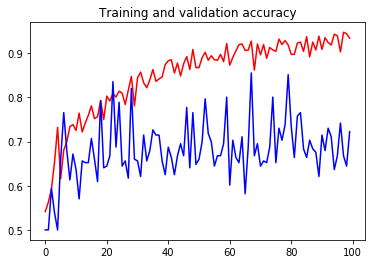

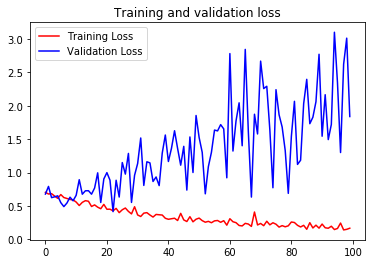

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()